In [1]:
import os
import skimage
import pylab
import numpy as np
import math
import cv2
from skimage import data
from skimage.color import rgb2grey
from skimage import filters, io
from scipy.signal import convolve2d
from scipy import ndimage as ndi

In [2]:
def pixel_difference(p1, p2) :
            return (p1[0]-p2[0])**2 + (p1[1]-p2[1])**2 + (p1[2] - p2[2])**2

In [3]:
left = cv2.imread("left.png")
right = cv2.imread("right.png")

right=skimage.img_as_float(right)
left=skimage.img_as_float(left)
max_dis = int(right.shape[0]/3)
height = right.shape[0]
width = right.shape[1]

In [206]:
image_Dl2r = np.zeros([max_dis, height, width])
image_Dr2l = np.zeros([max_dis, height, width])
for d in range(max_dis):
    for i in range(height):
        for j in range(width):
            image_Dl2r[d][i][j] = pixel_difference(right[i][j-d], left[i][j])
            
for d in range(max_dis):
    for i in range(height):
        for j in range(width - d):
            image_Dr2l[d][i][j] = pixel_difference(right[i][j], left[i][j+d])
        for j in range(width - d, width):
            image_Dr2l[d][i][j] = pixel_difference(right[i][j], left[i][width - 1])

In [207]:
for d in range(max_dis):
    image_temp = image_Dl2r[d]
#     image_Dl2r[d] = ndi.gaussian_filter(image_temp, sigma = 0.9)
#     image_new = np.zeros([height,width])
    image_Dl2r[d] = cv2.ximgproc.jointBilateralFilter(left.astype(np.float32),\
                                               image_temp.astype(np.float32), 3, 2, 0.5)

# for d in range(max_dis):
#     image_temp = image_Dr2l[d]
#     image_Dr2l[d] = ndi.gaussian_filter(image_temp, sigma = 0.9)
# #     image_new = np.zeros([height,width])
# #     image_Dr2l[d] = cv2.ximgproc.jointBilateralFilter(left.astype(np.float32),\
# #                                                image_temp.astype(np.float32), , 3, 3)


In [208]:
image_DSIl2r = np.zeros([height, width])
for i in range(height):
    for j in range(width):
        min_val = 9999
        min_d = -1
        for d in range(max_dis):
            if image_Dl2r[d][i][j] < min_val:
                min_val = image_Dl2r[d][i][j]
                min_d = d
        image_DSIl2r[i][j] = min_d

# image_DSIr2l = np.zeros([height, width])
# for i in range(height):
#     for j in range(width):
#         min_val = 9999
#         min_d = -1
#         for d in range(max_dis):
#             if image_Dr2l[d][i][j] < min_val:
#                 min_val = image_Dr2l[d][i][j]
#                 min_d = d
#         image_DSIr2l[i][j] = min_d

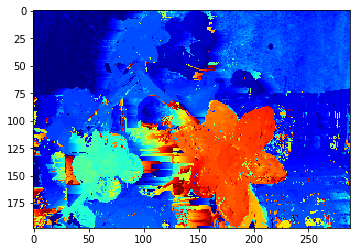

In [209]:
pylab.imshow(image_DSIl2r, cmap="jet")
pylab.show()

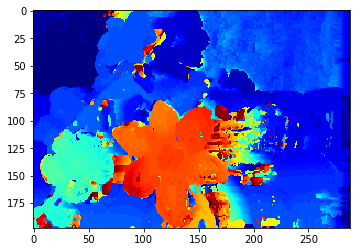

In [198]:
pylab.imshow(image_DSIr2l, cmap="jet")
pylab.show()

In [199]:
for i in range(height):
    for j in range(width):
        if abs(image_DSIl2r[i][j] - image_DSIr2l[i][j-40]) > 15:
            image_DSIl2r[i][j] = -1

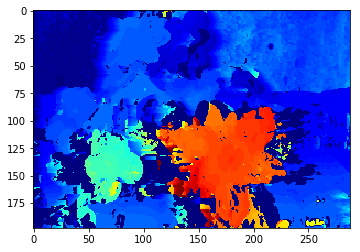

In [200]:
pylab.imshow(image_DSIl2r, cmap="jet")
pylab.show()

In [210]:
ground_truth = np.load("gt.npy")
sum = 0
count = 0
for i in range(height):
    for j in range(width):
        if image_DSIl2r[i][j] == -1 : 
            continue
        sum += (image_DSIl2r[i][j] - ground_truth[i][j]) ** 2
        count += 1
result = math.sqrt(sum / count)
print(result)

13.30391778649938
